In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cantera as ct

In [2]:
gas = ct.Solution("zahnle_earth_2.yaml")

In [16]:
gas.TP = 277.00000000000000 , 970584.54897544277*.1
rxs = gas.reaction_equations()
Navo = ct.avogadro/1e3

for i,rx in enumerate(rxs):
#     print(rx)
    print(i+1,rx,'  ',gas.reverse_rate_constants[i]*((1/1e3)*(1/Navo)*(1e6))**0)

1 2 H (+M) <=> H2 (+M)    4.429811483639138e-71
2 H + O (+M) <=> OH (+M)    1.6800183271361315e-69
3 H2 + O <=> H + OH    25143.553885318346
4 H + OH (+M) <=> H2O (+M)    2.411672322898718e-81
5 H2 + OH <=> H + H2O    1.1154878063826035e-05
6 2 OH <=> H2O + O    0.00030935753606355895
7 2 OH <=> H2 + O2    2.53846934698038e-44
8 2 O (+M) <=> O2 (+M)    1.2007668495396877e-82
9 O + OH <=> H + O2    0.0047575694483598125
10 C + O (+M) <=> CO (+M)    6.323209757491826e-190
11 C + O2 <=> CO + O    1.6695215390608599e-99
12 CO + O (+M) <=> CO2 (+M)    1.065103056876506e-90
13 CO + OH <=> CO2 + H    1.0618793511357614e-09
14 CO2 + O <=> CO + O2    3.958471429038826e-27
15 C + OH <=> CO + H    1.2984285968063574e-110
16 CO + H (+M) <=> HCO (+M)    0.001046835001964563
17 HCO + O <=> CO2 + H    1.4978301746548533e-75
18 HCO + O <=> CO + OH    1.054957891989558e-58
19 HCO + OH <=> CO + H2O    1.4218663170765391e-70
20 H + HCO <=> CO + H2    2.857793141626885e-59
21 H + HCO (+M) <=> H2CO (+M)   

411 O + O2 (+M) <=> O3 (+M)    1.78468745075739e-08
412 O + O3 <=> 2 O2    1.0616057010158509e-68
413 H + O3 <=> O2 + OH    4.909179259911135e-53
414 O3 + OH <=> HO2 + O2    9.037214046040023e-26
415 CH3 + O3 <=> H2CO + HO2    5.948386679588775e-65
416 O1D + O3 <=> 2 O2    4.861889851187533e-100
417 O3 + S <=> O2 + SO    4.0605271578683555e-70
418 O3 + SO <=> O2 + SO2    1.473691780402064e-76
419 HS + O3 <=> HSO + O2    1.8491380146542737e-50
420 CS + O3 <=> O2 + OCS    1.1455116211329276e-100
421 H + NO (+M) <=> HNO (+M)    1.1300422600133722e-25
422 HCO + NO <=> CO + HNO    6.420047639527841e-16
423 NH + OH <=> H + HNO    4.856798287710797e-06
424 NH + O2 <=> HNO + O    0.054115058721009086
425 NH2 + O <=> H + HNO    6.739675143116755e-10
426 NH2 + O2 <=> HNO + OH    2.6153572361431997e-19
427 CH3O + NO <=> H2CO + HNO    4.211792430464108e-12
428 H + HNO <=> H2 + NO    1.748236001921297e-35
429 HNO + O <=> NO + OH    9.776979883654598e-34
430 HNO + OH <=> H2O + NO    9.09640408921530

In [ ]:
9.2251180378785965E-056
9.347354543798237e-56

In [17]:
ct.avogadro

6.02214076e+26

In [1]:
import numpy as np
import cantera as ct
from ImpactAtmosphere import zahnle_path
ct.add_directory(zahnle_path)

In [2]:
gas = ct.Solution('zahnle.yaml')

In [86]:
gas.TP = 277.00000000000000 ,970658.64285897720*.1

In [80]:
Navo = 6.022e23

In [81]:
gas.density/(gas.mean_molecular_weight/1000)*Navo/1e6

2.5380099651103834e+19

In [74]:
114314546.75517964/141.09833867741432

810176.4189905238

In [95]:
rxs = gas.reaction_equations()

for i,rx in enumerate(rxs):
    print(rx)
    print(gas.forward_rate_constants[i]*((1/1e3)*(1/Navo)*(1e6))**1)

2 H (+M) <=> H2 (+M)
1.8982820782992298e-13
H + O (+M) <=> OH (+M)
5.417151983213347e-13
H2 + O <=> H + OH
3.1418039027064678e-18
H + OH (+M) <=> H2O (+M)
1.961770588201142e-12
H2 + OH <=> H + H2O
3.516191468038715e-15
2 OH <=> H2O + O
1.2959111455858166e-12
2 OH <=> H2 + O2
4.7584326379680004e-52
2 O (+M) <=> O2 (+M)
3.288959119594389e-14
O + OH <=> H + O2
6.710738290504839e-12
C + O (+M) <=> CO (+M)
9.995031986437469e-13
C + O2 <=> CO + O
1.6000373988708073e-11
CO + O (+M) <=> CO2 (+M)
2.418857697239969e-17
CO + OH <=> CO2 + H
1.2419581864972952e-13
CO2 + O <=> CO + O2
7.927570820008923e-53
C + OH <=> CO + H
1.0570173019951882e-10
CO + H (+M) <=> HCO (+M)
1.182605389796714e-15
HCO + O <=> CO2 + H
5.0001168714712727e-11
HCO + O <=> CO + OH
5.0001168714712727e-11
HCO + OH <=> CO + H2O
1.7000397363002324e-10
H + HCO <=> CO + H2
1.8000420737296582e-10
H + HCO (+M) <=> H2CO (+M)
3.990057635828179e-11
CO + H2 (+M) <=> H2CO (+M)
1.980808397448269e-68
2 HCO <=> CO + H2CO
4.5001051843241454e-

In [60]:
((1/1e3)*(1/Navo)*(1e6))**1

1.6605778811026235e-21

In [61]:
1/2.6146942154335465E+019

3.824539e-20

In [48]:
4.3718620790257058E-071/(2.6146942154335465E+019)

1.6720357023854892e-90

In [45]:
2.6146942154335465E+019/2.5380099651103834e+19

1.030214321999255

In [2]:
from ruamel.yaml import YAML

yaml=YAML(typ='safe') 

fil = open('zahnle_earth_full.yaml','r')
data = yaml.load(fil)
fil.close()


fil = open('zahnle_earth.yaml','w')
yaml.dump(data,fil)
fil.close()



In [30]:
# data

In [23]:
fil = open("test.yaml",'r')
lines = fil.readlines()
fil.close()
counter = 10
counter1 = 0
newlines = []
for line in lines:
    if line=="        -\n":
        if counter1<10:
            newlines.append("          "+"P2:\n")
        else:
            newlines.append("          "+"P1:\n")
        counter = 0
        counter1 = 0
    elif counter<7:
        newlines.append("  "+line)
        counter += 1
    else:
        newlines.append(line)
    counter1+=1

In [34]:
fil = open('zahnle.yaml','w')

for line in newlines:
    fil.write(line)
    
fil.close()

In [1]:
from yaml import load, dump
try:
    from yaml import CLoader as Loader, CDumper as Dumper
except ImportError:
    from yaml import Loader, Dumper

In [2]:
fil = open('zahnle_earth_new.yaml','r')
data = load(fil, Loader=Loader)
fil.close()

In [3]:
output = dump(data, Dumper=Dumper,sort_keys=False)

In [9]:
# output

In [4]:
fil = open('zahnle_earth_1.yaml','w')
fil.write(output)
fil.close()

In [1]:
import numpy as np

In [2]:
x = np.linspace(0,100,10)
y = np.random.rand(10)*10

In [27]:
import cantera as ct

In [28]:
gas = ct.Solution('gri30.yaml')
gas.density

0.08189392763801234

In [29]:
k1 = gas.forward_rate_constants.copy()

In [30]:
gas.TP = 300,101325.00*10
gas.density

0.8189392763801233

In [26]:
gas.P

101325.00000000001

In [31]:
k2 = gas.forward_rate_constants.copy()

In [33]:
k1==k2

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [23]:
k2

array([3.50973976e+06, 1.21865964e+07, 2.08745126e+08, 2.00000000e+10,
       1.28660259e+09, 5.70000000e+10, 8.00000000e+10, 1.50000000e+10,
       1.50000000e+10, 5.06000000e+10, 4.25705400e+08, 2.02883709e+06,
       3.00000000e+10, 3.00000000e+10, 6.56770527e+09, 1.00000000e+10,
       1.00000000e+10, 2.57834352e+09, 3.32059584e+08, 5.00000000e+10,
       5.18916383e+09, 1.27604672e+06, 2.66761459e+09, 3.00000000e+10,
       3.45803998e+09, 2.24000000e+10, 2.94952874e+09, 1.00000000e+11,
       1.78499197e+08, 8.87159421e+08, 8.94265973e-02, 1.81209656e+02,
       8.97512402e+07, 3.96335829e+09, 5.90933200e+10, 4.95419787e+09,
       2.78675019e+09, 4.86309303e+07, 0.00000000e+00, 1.42640387e+09,
       1.06696765e+10, 5.50000000e+08, 1.95716738e+08, 2.83234726e+09,
       2.61740818e+10, 6.10243152e+10, 8.83789717e+08, 1.63394081e+09,
       1.65000000e+11, 4.66813157e+09, 3.00000000e+10, 4.61315038e+10,
       2.04414208e+08, 7.45691532e+08, 7.34000000e+10, 1.48738254e+08,
      

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [5]:
start = np.loadtxt('start.txt')
end = np.loadtxt('end.txt')

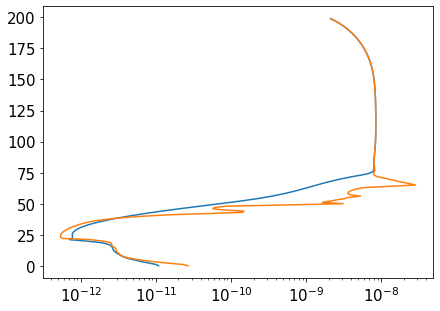

In [9]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

ax.plot(start,range(len(start)))

ax.plot(end,range(len(start)))


ax.set_xscale('log')
plt.show()

In [265]:
from scipy.io import FortranFile, FortranEOFError

In [271]:
f = FortranFile('src/outfile.dat', 'r')
nq = f.read_record(np.int32)[0]
nz = f.read_record(np.int32)[0]
kj = 47+5+1
tmp = f.read_record(np.dtype("S8"))
species_names = np.char.strip(tmp.astype('U')).tolist()
xs_x_qy = f.read_record(np.double).reshape((nz,kj,200),order='F')
usol = f.read_record(np.double).reshape((nq,nz),order='F')
prates = f.read_record(np.double).reshape((nz,kj),order='F')
density = f.read_record(np.double).reshape((nz),order='F')
densities= f.read_record(np.double).reshape((nz,nq+6),order='F')
f.close()

sol = {}
for i,sp in enumerate(species_names):
    sol[sp] = usol[i]

In [ ]:
1040000

In [102]:
f = FortranFile('photochempy_prates.dat', 'r')
prates_py = f.read_record(np.double).reshape((64,200),order='F')
f.close()

In [103]:
amean = np.loadtxt('amean.txt')
pratesH2O = np.loadtxt('prates.txt')

In [164]:
tau,w0= np.loadtxt('tau.txt').T

In [98]:
f = FortranFile('src/amean.dat', 'r')
amean = np.zeros((200,201))
for i in range(200):
    amean[i] = f.read_record(np.double).reshape((201),order='F')
f.close()

In [99]:
# amean[0]

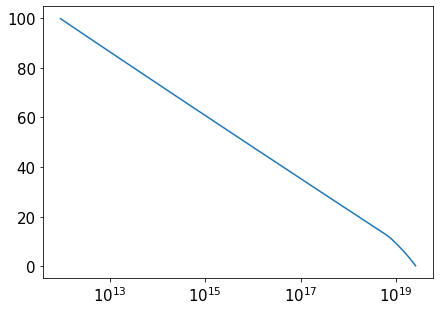

In [273]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

# ax.plot(start,range(len(start)))

# ax.plot(sol['O'],range(len(start)))
# ax.plot(sol['OH'],range(len(start)))

alt = np.arange(0.25,99.751,0.5)
# ax.plot(prates[:,0],alt)
# ax.plot(tau,range(len(start)))
# ax.plot(w0,range(len(start)))
ax.plot(density,alt)



# ax.set_xlim(1e-15,1e5)
ax.set_xscale('log')
plt.show()

In [108]:
for i in range(len(amean)):
    print(np.min(amean[i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.833199367585143e-288
4.050762058366024e-43
4.687996925738699e-12
0.0013208842863076118
0.04934327577725603
0.1689304738827594
0.25365160618210064
0.2989324389382214
0.3277041125209708
0.3508149303661415
0.3719402984353454
0.39336099686449383
0.4150495492922338
0.43694751952747923
0.4590000240787719
0.4811246609147776
0.5032916961124686
0.5254179350621206
0.5474174077984583
0.5692632697137067
0.5909029913164091
0.6122823167407158
0.633357208879666
0.6540870901015564
0.6744326435253247
0.6943608359688129
0.7138470805570677
0.7328683716621605
0.7514089165989819
0.7694556702962266
0.78699911497434
0.8040332122985548
0.8205547667131954
0.8365634495700215
0.8520613003522659
0.867052279339929
0.8815422375142092
0.8955385641225191
0.9090499426027976
0.922086125290608
0.9346577867574061
0.9467762560112842
0.9584534077651903
0.9697015199343046
0.9805331796190462
0.99096111268883
1.00099812583985

In [109]:
np.min(amean)

0.0

ValueError: x and y must have same first dimension, but have shapes (201,) and (200,)

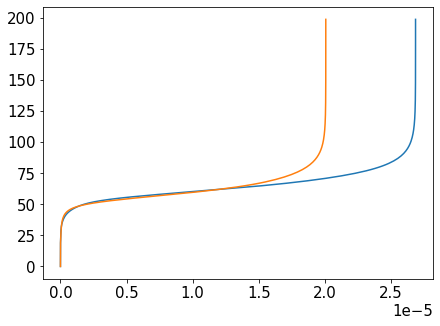

In [185]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

# ax.plot(start,range(len(start)))

# ax.plot(sol['O'],range(len(start)))
# ax.plot(sol['OH'],range(len(start)))
ax.plot(prates[:,0],range(len(start)))
ax.plot(prates_py[2],range(len(start)))
ax.plot(amean[0],range(len(start)))
ax.plot(pratesH2O,range(len(start)))



ax.set_xlim(1e-15,1000)
ax.set_xscale('log')
plt.show()

In [239]:
alt = np.arange(0.25,99.751,0.5)

In [238]:
len(alt

196

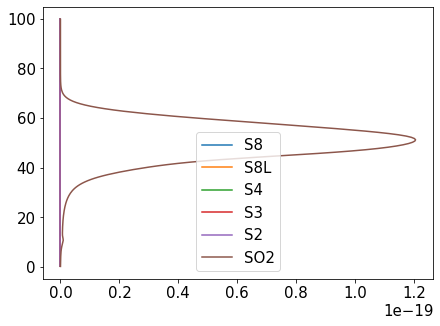

In [259]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

specs = ['S8','S8L','S4','S3','S2','SO2']

for sp in specs:
    ax.plot(sol[sp],alt,label=sp)


# ax.set_xlim(1e-40,1e-20)
# ax.set_ylim(1e-30,50)
ax.legend()
# ax.set_xscale('log')
plt.show()

In [257]:
sol['S8']

array([-3.44800400e-29, -2.74677684e-29, -2.15480391e-29, -1.58715270e-29,
       -6.27302377e-30,  3.21828624e-30,  1.14492905e-29,  1.79352480e-29,
        2.17617405e-29,  2.45891096e-29,  2.73669831e-29,  3.04077571e-29,
        3.30480162e-29,  3.53292299e-29,  3.71659345e-29,  3.86847662e-29,
        3.98248530e-29,  4.05952547e-29,  4.09812838e-29,  4.09374628e-29,
        4.02238544e-29,  3.84312145e-29,  3.50517516e-29,  2.95465602e-29,
        2.14827006e-29,  1.08011857e-29, -7.44399192e-31, -1.08005402e-29,
       -1.84747342e-29, -2.35624052e-29, -2.63480219e-29, -2.76756670e-29,
       -2.84506698e-29, -2.92696315e-29, -3.03805144e-29, -3.17846324e-29,
       -3.33348780e-29, -3.48440449e-29, -3.61950143e-29, -3.73261707e-29,
       -3.82163509e-29, -3.88651257e-29, -3.92842322e-29, -3.94948474e-29,
       -3.95227324e-29, -3.93948242e-29, -3.91371792e-29, -3.87737278e-29,
       -3.83257637e-29, -3.78117725e-29, -3.72475320e-29, -3.66462535e-29,
       -3.60189181e-29, -

In [245]:
wv, flx = np.loadtxt('Sun_4.0Ga.txt',skiprows=1).T

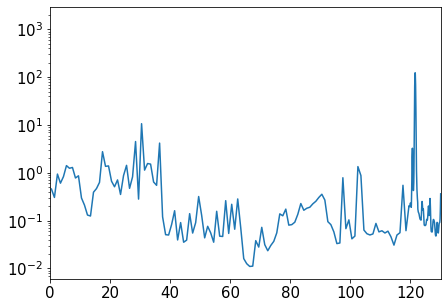

In [249]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])



ax.plot(wv,flx)


ax.set_xlim(0,130)
# ax.set_ylim(1e-30,50)
# ax.legend()
ax.set_yscale('log')
plt.show()

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
fil = open('atmosphere10_13.txt','r')
lines = fil.readlines()
fil.close()

specs = lines[0].split()

sol = {}
for i,sp in enumerate(specs):
    data = []
    
    for line in lines[1:]:
        data.append(float(line.split()[i]))
    data = np.array(data)
    sol[sp] = data

In [4]:
for i,sp in enumerate(specs):
    if np.min(sol[sp]) < 1e-30:
        print(np.min(sol[sp]),sp,)

1e-40 C
1.561431370397456e-32 CH
3.034738751906692e-39 C2
1.037682788081259e-31 O3
2.34761574602451e-31 HOCl


In [5]:
fil = open('atmosphere_Hadean.txt','r')
lines = fil.readlines()
fil.close()

specs1 = lines[0].split()

sol1 = {}
for i,sp in enumerate(specs1):
    data = []
    
    for line in lines[1:]:
        data.append(float(line.split()[i]))
    data = np.array(data)
    sol1[sp] = data

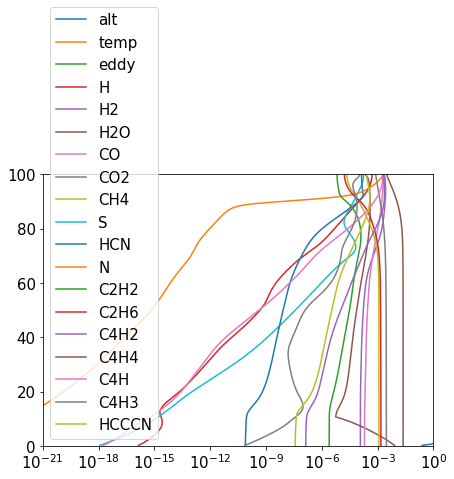

In [26]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

species = ['CH4','CO','H2','N','H','O2','O','HCN','CO2','HCCCN','']
species = ['HCN','HCCCN','CO2']

for i,sp in enumerate(specs):
    if np.max(sol[sp]) > 1e-4:
        try:
            sp.index('S')
            sp.index('C')

            
        except:
#             pass
#             print(sp)
            ax.plot(sol[sp],sol['alt'],label=sp)
#     ax.plot(sol1[sp],sol1['alt'],'C'+str(i)+'--')

ax.set_xlim(1e-21,1e-0)
ax.set_ylim(0,100)
ax.legend()
ax.set_xscale('log')
plt.show()

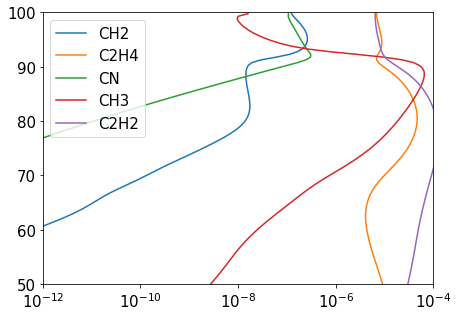

In [7]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

species = ['CH2','C2H4','CN','CH3','C2H2']

for i,sp in enumerate(species):


    ax.plot(sol[sp],sol['alt'],label=sp)
#     ax.plot(sol1[sp],sol1['alt'],'C'+str(i)+'--')



ax.set_xlim(1e-12,1e-4)
ax.set_ylim(50,100)
ax.legend()
ax.set_xscale('log')
plt.show()

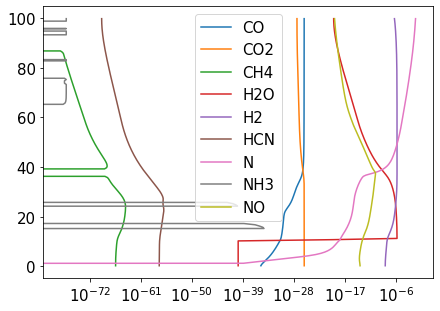

In [46]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[7,5])

specs = ['CO','CO2','CH4','H2O','H2','HCN','N','NH3','NO']

for sp in specs:
    ax.plot(sol[sp],sol['alt'],label=sp)


# ax.set_xlim(1e-40,1e-20)
# ax.set_ylim(1e-30,50)
ax.legend()
ax.set_xscale('log')
plt.show()

In [119]:
f = FortranFile('src/rhs.dat', 'r')
rhs = f.read_record(np.double).reshape((91,200),order='F')
usol = f.read_record(np.double).reshape((91,200),order='F')
f.close()

In [173]:

for j in range(200):
    for i in range(91):
        if usol[i,j]>1e-30:
            if np.abs(rhs[i,j]/usol[i,j]) > .001:
                print(i+1,j+1,rhs[i,j]/usol[i,j])

29 11 -0.001532132456459334
29 12 -0.0020080737294813373
29 91 -0.0010375875550435207
38 176 -0.00133368745062309
38 177 -0.001433268019279581
38 178 -0.0013248845146731352
38 179 -0.0011829839290638411
38 180 -0.0010468554331737833
30 183 -0.0010003458781536485
31 188 -0.0011797001240334785
31 189 -0.001359839101057443
31 190 -0.001385947183373756
31 191 -0.0013071295303265112
31 192 -0.0011807582402812166
31 193 -0.0010414886098450602
31 197 -0.0011184288461951095
4 198 -0.004413712105134638
30 198 -0.004157472479537435
31 198 -0.02159000110934038
37 198 -0.0038464645022391005
4 199 -0.02206476066974878
30 199 -0.027374285090139876
31 199 -0.25294469948946857
37 199 -0.020301728641923075
44 199 -0.0028551455802466614
3 200 -0.0014744504217105415
4 200 0.002796399660143956
30 200 0.0029626615362264553
31 200 0.00314598027762699
37 200 0.0024564833624160756
44 200 0.0014381727376708835


In [175]:
np.max(usol)

0.00993812978743652

In [147]:
ind = np.argmax(np.abs(rhs[inds]/usol[inds]))

In [157]:
usol[inds][ind]

2.759099020442542e-20

In [156]:
rhs[inds][ind]

-6.978994725875258e-21

In [163]:
np.abs(rhs[inds]/usol[inds])[ind]

0.25294469948946857